In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Import Necessary libraries needed

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\loan_prediction.csv.txt")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Load and read the data

## Data Explanation
- Loan_id is not necessary. This will not help to predict the outcome. So, remove it.
- All the other columns helps to determine the loan application status
- There are only 614 rows. So, try not to remove any data which might make the data biased

In [3]:
print(data['Gender'].nunique())
print(data['Married'].nunique())
print(data['Dependents'].nunique())
print(data['Education'].nunique())
print(data['Self_Employed'].nunique())
print(data['Loan_Amount_Term'].nunique())
print(data['Credit_History'].nunique())
print(data['Property_Area'].nunique())
print(data['Loan_Status'].nunique())

2
2
4
2
2
10
2
3
2


There are only small no.of variables in each column

In [4]:
data = data.drop(['Loan_ID'], axis=1)

Dropped Load_ID which is not necessary to predict the loan application status

## Exploratory Data Analysis
### Identifying variables and data types

In [5]:
data.shape

(614, 12)

There are only less no. of data. So, try not to delete it

### Checking data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


- Various columns are of object datatype. Loan_status, Property_area, Self_employed, Education, Dependents, Married, Gender
- Other columns are having both integer and float type of data
- There are NaN values present in object type data. So, first encode and then treat it

In [7]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

There are 12 columns which is going to be further used in EDA

## Encoding

In [8]:
data.Gender[data.Gender == 'Male'] = 1
data.Gender[data.Gender == 'Female'] = 2

data.Married[data.Married == 'Yes'] = 1
data.Married[data.Married == 'No'] = 2

data.Dependents[data.Dependents == '0'] = 1
data.Dependents[data.Dependents == '1'] = 2
data.Dependents[data.Dependents == '2'] = 3
data.Dependents[data.Dependents == '3+'] = 4

data.Self_Employed[data.Self_Employed == 'Yes'] = 1
data.Self_Employed[data.Self_Employed == 'No'] = 2

Encode the categorical variable separately. If we use any encoding technique, that also encodes NaN values

In [9]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

Use label encoder to encode the Non-null column to encode each and every column

In [10]:
edu = lab_enc.fit_transform(data['Education'])
data['Education'] = edu
area = lab_enc.fit_transform(data['Property_Area'])
data['Property_Area'] = area
status = lab_enc.fit_transform(data['Loan_Status'])
data['Loan_Status'] = status

Thus the data is encoded using separately and using label encoder

## Missing value treatment

In [11]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- There are NaN values present in Gender, Married, Dependents, Self_employed, Loan_amount, Loan_amount_term, Credit_history.
- Since there are only small range of data available, all NaN values of Gender, married, dependents, Self_employed, credit_history can be treated with mode value because these are categorical variable
- All NaN values of Loanamount, loan_amount_term can be treated with mean value because these are continuous variables
- There are no large data missing. So, treat it

In [12]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

All the NaN alues are treated using mean and mode

## Visualisation of categorical variable

In [13]:
class_data = data[['Gender','Married','Dependents','Self_Employed','Credit_History','Education','Loan_Amount_Term','Property_Area','Loan_Status']]

<function matplotlib.pyplot.show(close=None, block=None)>

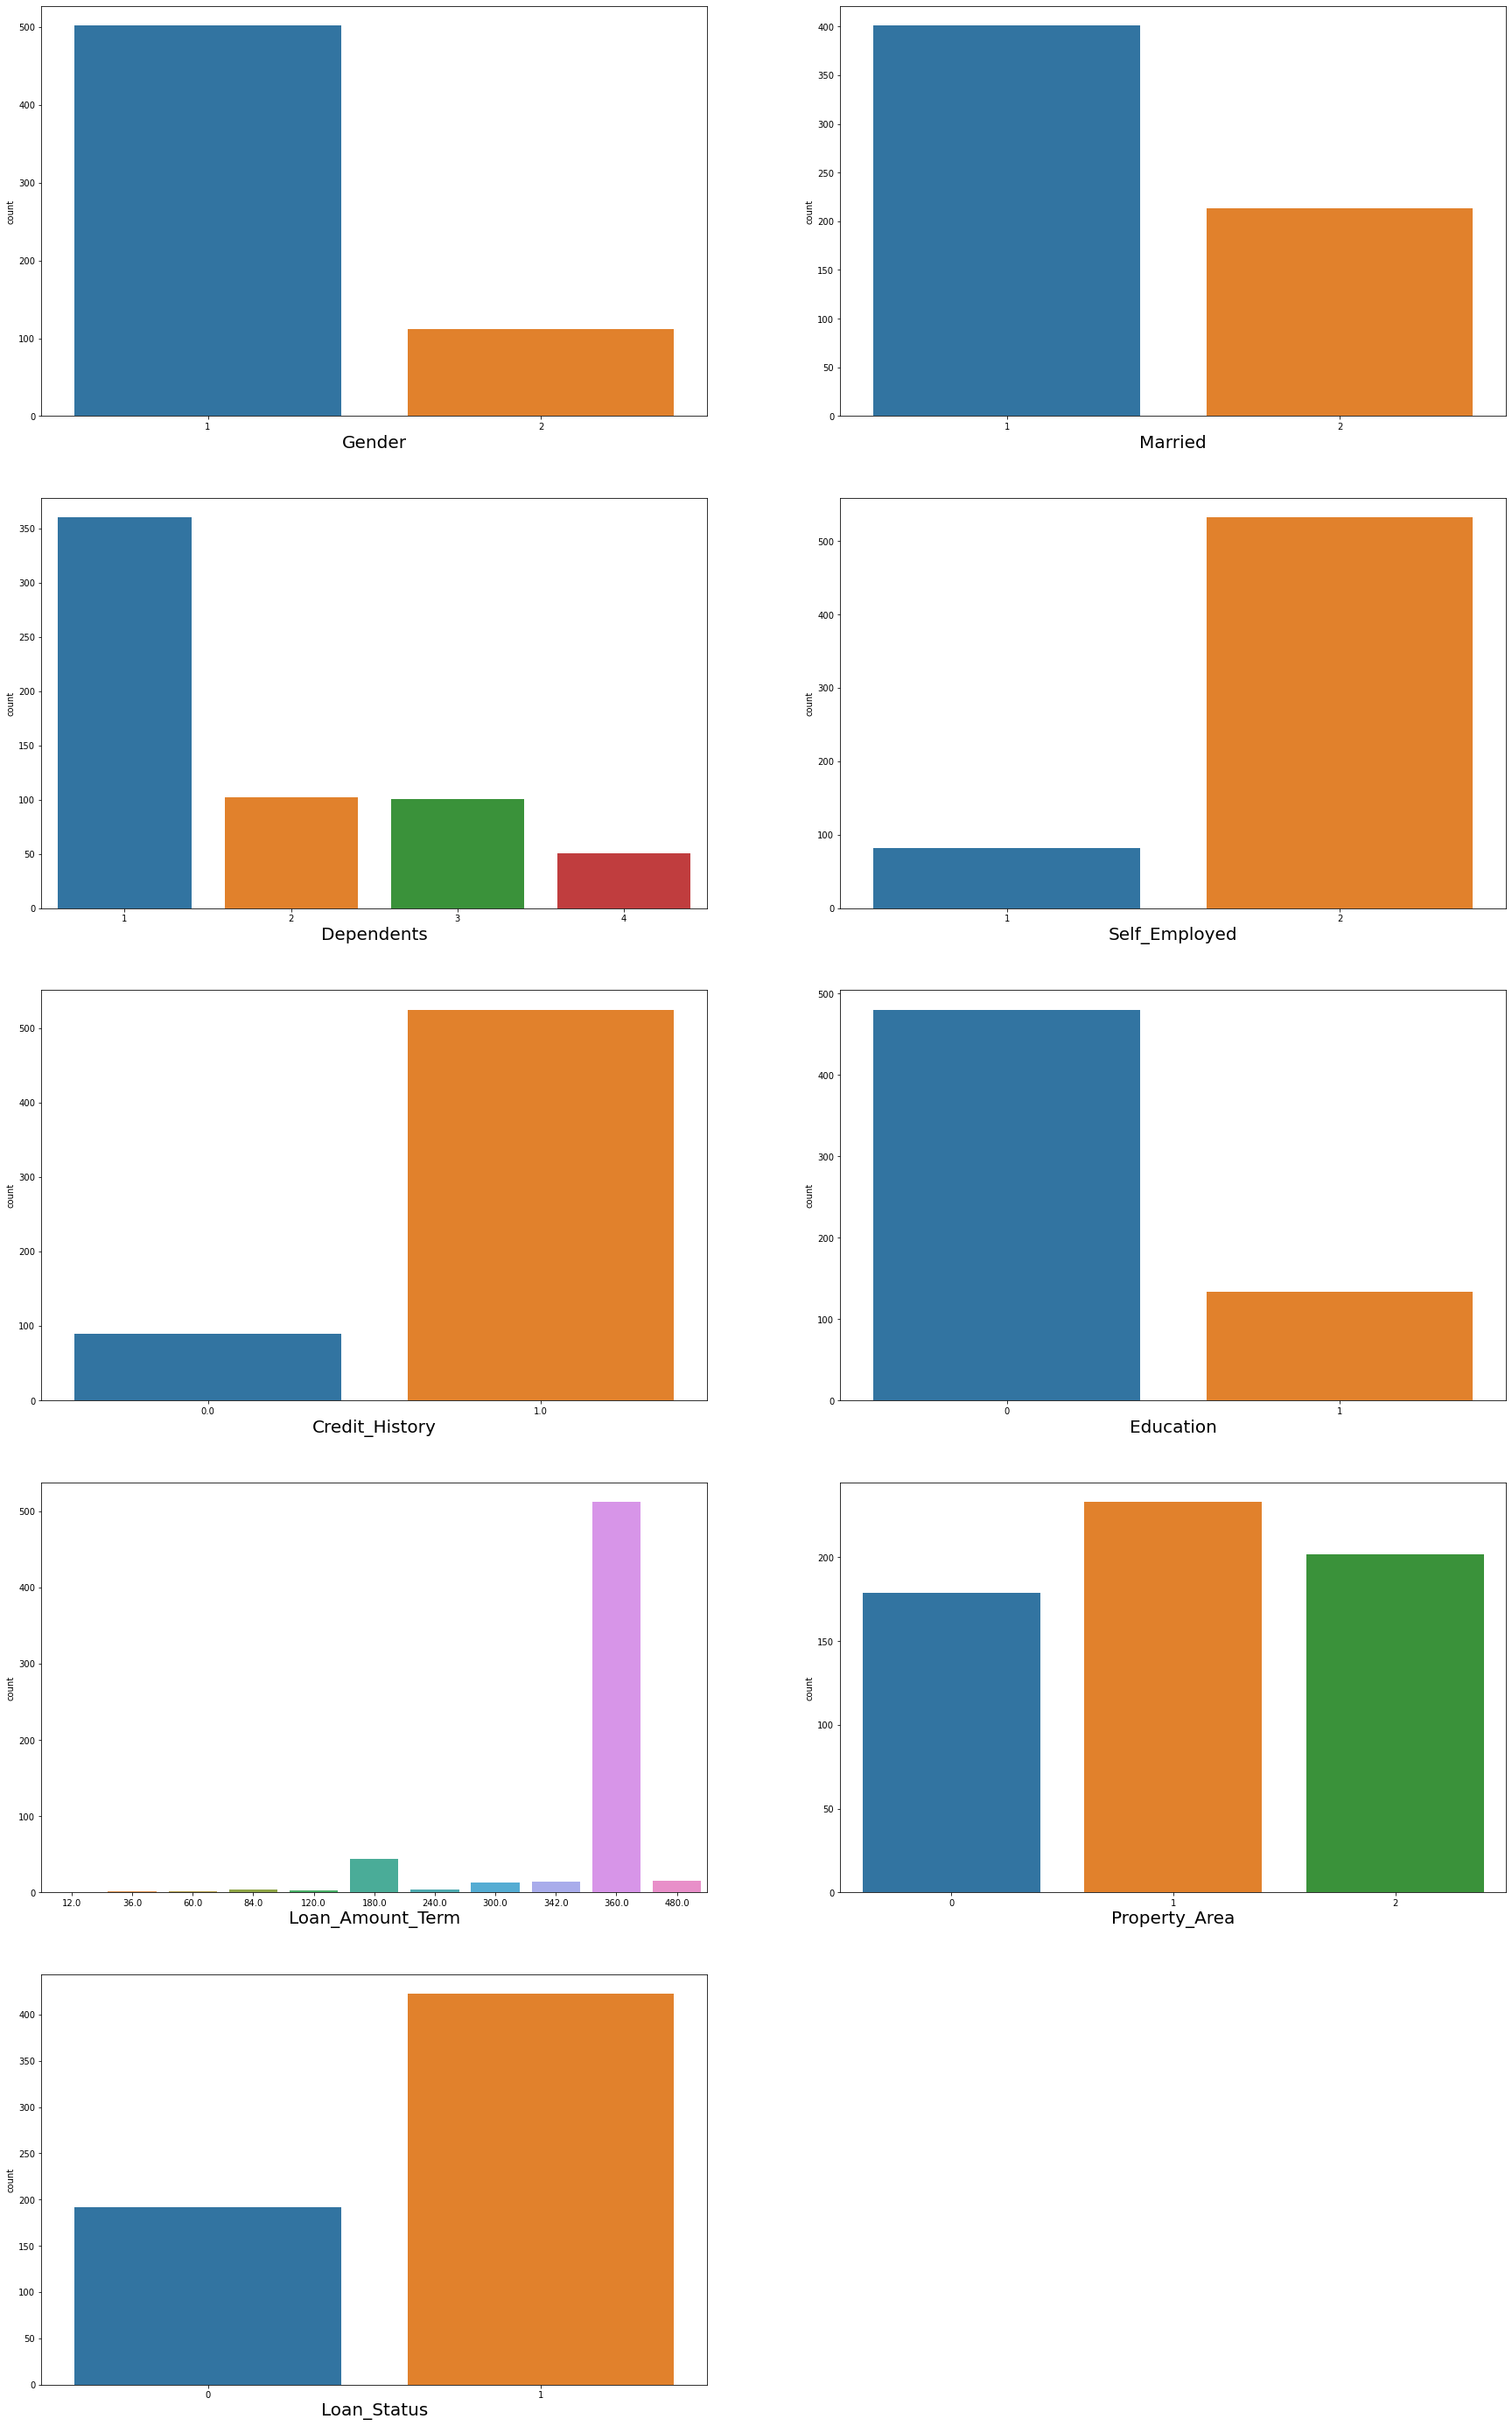

In [14]:
plt.figure(figsize = (30,50), facecolor = 'white')
plotnumber = 1

for column in class_data:
    if plotnumber <=10:
        ax =  plt.subplot(5,2,plotnumber)
        sns.countplot(x = column, data = class_data)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- Male applicants are more compared to female applicants
- Married people are more applying for loan than unmaried people
- Having 1 dependent is more compared to others
- Slef-employed people are less compared to working for others
- Credit payment history is more
- Educated people are less compared to others applying for loan
- Loan amount term is 360 months more likely compared to any other no. of months
- Semiurban people are more followed by urban people for applying loan
- No is the loan status mostly recieved by the applicants

In [15]:
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Since the loan_status is imbalanced, balance it before fitting into the model

## Visualisation of Continuous variable

In [16]:
continuous_data = data.drop(['Gender','Married','Dependents','Self_Employed','Credit_History','Education','Loan_Amount_Term','Property_Area','Loan_Status'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

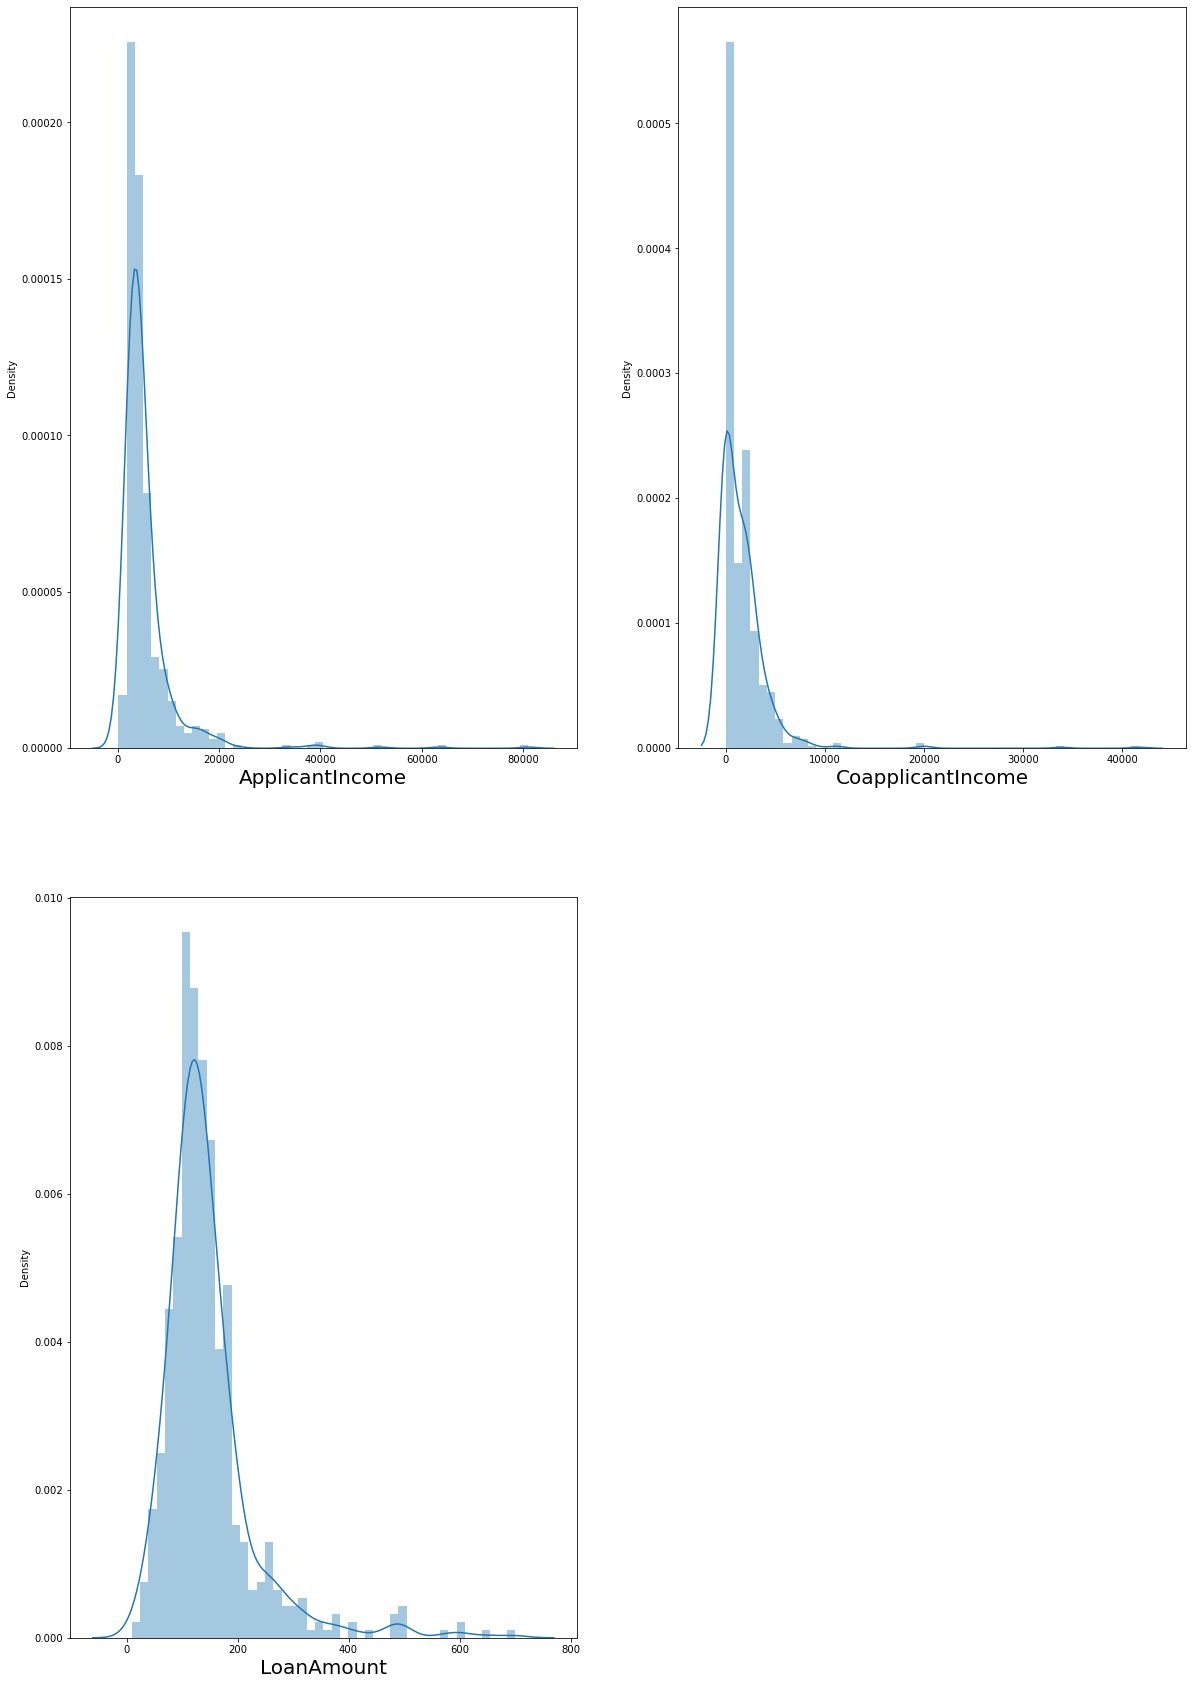

In [17]:
plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in continuous_data:
    if plotnumber <=4:
        ax =  plt.subplot(2,2,plotnumber)
        sns.distplot(continuous_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- ApplicantIncome looks normally distributed but skewed
- CoapplicantIncome looks normally distributed but skewed
- LoanAmount looks normally distributed but skewed

## Describing the data

In [18]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.182410,1.346906,1.744300,0.218241,1.866450,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,1.000000,1.000000,1.000000,0.000000,1.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,2.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,2.000000,0.000000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


This data has to be standardised because it contains both categorical and continuous values

## Correlation

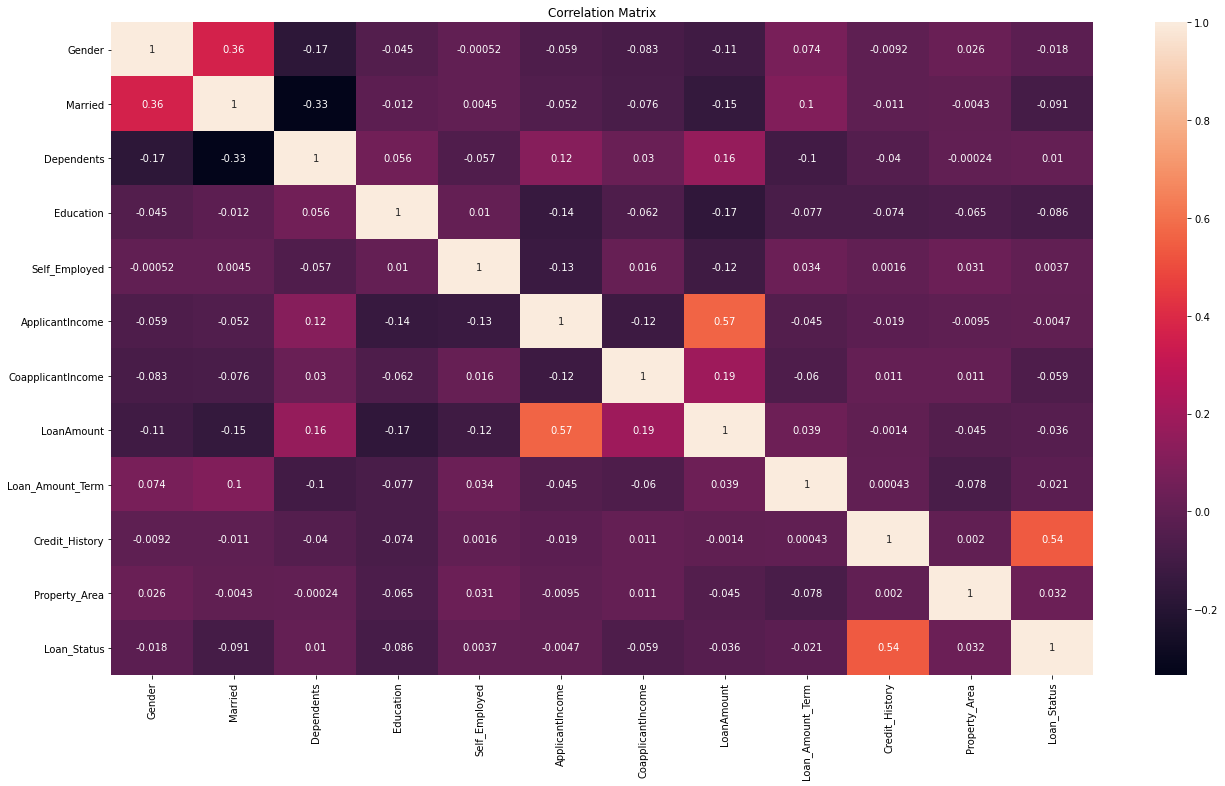

In [19]:
corr_mat = data.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

There is no strong positive or negative correlation between the variables

## Collinearity

<function matplotlib.pyplot.show(close=None, block=None)>

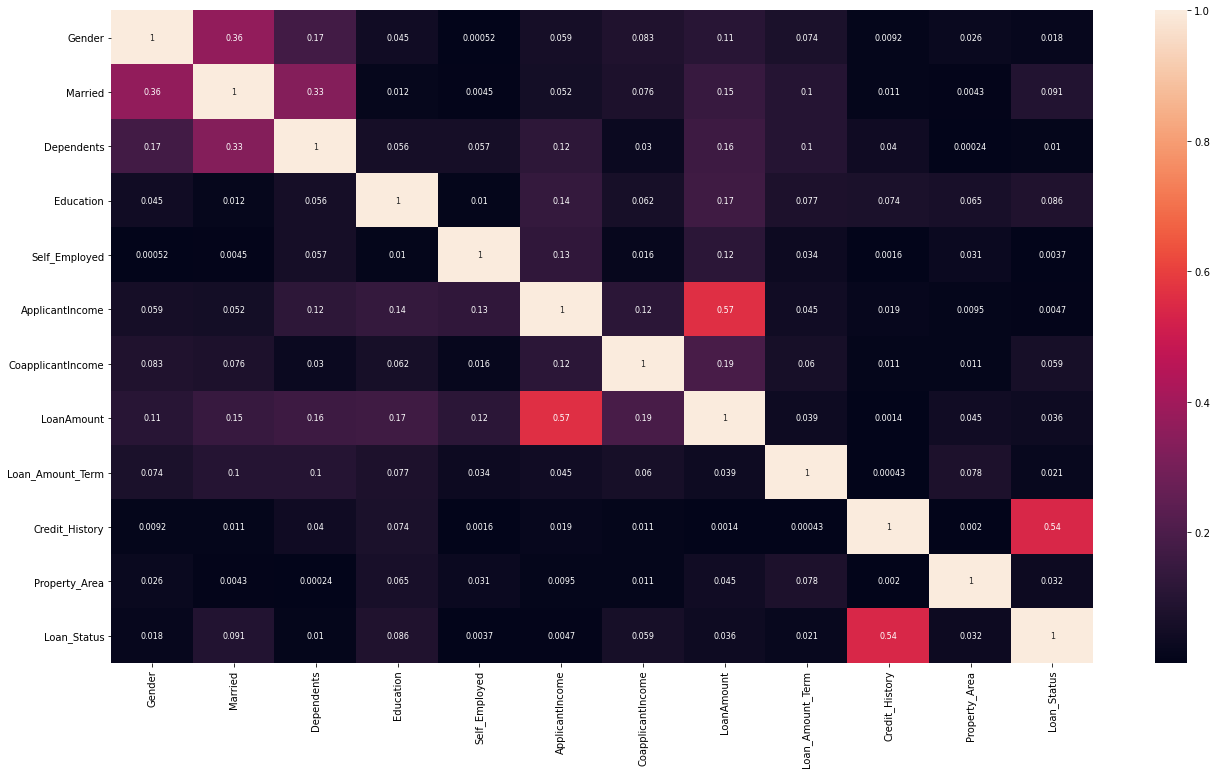

In [20]:
data_corr = data.corr().abs()
plt.figure (figsize = (22,12))
sns.heatmap(data_corr,annot = True, annot_kws = {'size':8}) 
plt.show

There is no collinearity between the variables

## Checking for skewness

In [21]:
x = data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [22]:
x.skew()

Gender               1.648795
Married              0.644850
Dependents           1.015551
Education            1.367622
Self_Employed       -2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

In [23]:
x.skew().sort_values()

Loan_Amount_Term    -2.389680
Self_Employed       -2.159796
Credit_History      -2.021971
Property_Area       -0.066196
Married              0.644850
Dependents           1.015551
Education            1.367622
Gender               1.648795
LoanAmount           2.726601
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

Thus the skewed values are sorted where Applicantincome and Coapplicantincome have heavily skewed values

## Treating skewness

In [24]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)  # this comes in nparray.so, convert to DataFrame
x = pd.DataFrame (x_new,columns = x.columns)

Use power transformation to treat the skewness of the data

In [25]:
x.skew().sort_values(ascending=False)

Gender               1.648795
Education            1.367622
Married              0.644850
Dependents           0.466065
Loan_Amount_Term     0.389827
LoanAmount           0.024376
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
Property_Area       -0.158267
Credit_History      -2.021971
Self_Employed       -2.159796
dtype: float64

Thus the skewness is treated

## Finding Outliers

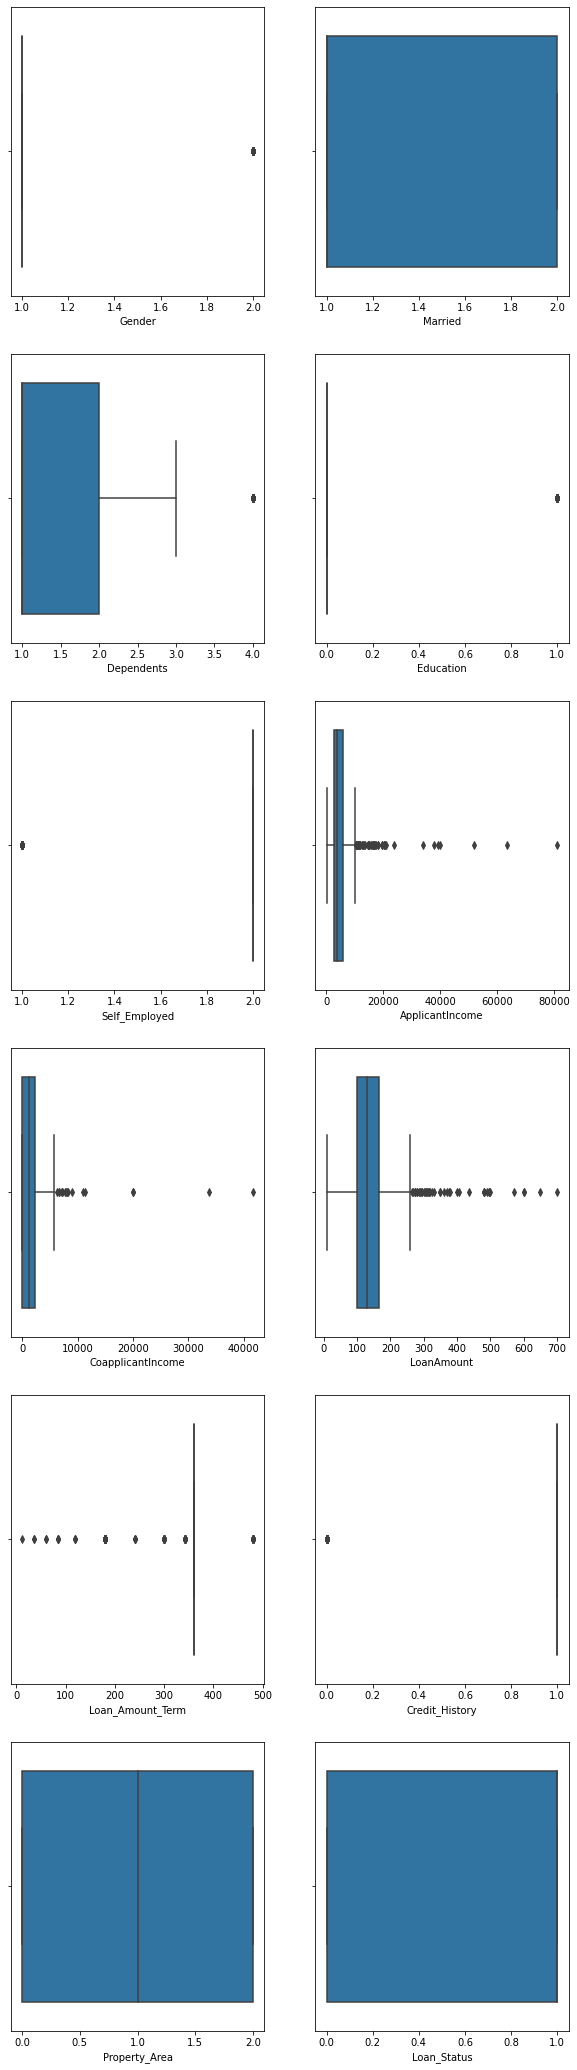

In [26]:
plt.figure(figsize=(10,50))
graph = 1
for column in data:
    if graph<=16:
        ax = plt.subplot(8,2,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

There are outliers in ApplicantIncome, Coapplicantincome and loan amount

### Quantifying

In [27]:
from scipy.stats import zscore

## Treating Outliers

In [28]:
z = np.abs(zscore(data))
threshold=4
np.where(z>4)

(array([ 68, 130, 155, 155, 171, 171, 177, 183, 185, 242, 262, 313, 333,
        333, 369, 402, 409, 417, 443, 487, 495, 497, 546, 561, 575, 581,
        585, 600, 604], dtype=int64),
 array([8, 7, 5, 7, 5, 7, 7, 5, 5, 8, 8, 8, 5, 7, 7, 6, 5, 6, 5, 7, 8, 8,
        8, 7, 8, 6, 8, 6, 7], dtype=int64))

There is too much of outlier in the columns, where the threshold is set to 4

In [29]:
data = data[(z<4).all(axis=1)]
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,1,0,2,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,2,0,2,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,1,2,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,2,1,0,2,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,1,0,2,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,4,0,2,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,2,0,2,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,3,0,2,7583,0.0,187.000000,360.0,1.0,2,1


Even on keeping the threshold as 4, there is loss of data. Check for % loss of data
## % Loss of data

In [30]:
Data_loss = ((614-588)/614)*100
Data_loss

4.234527687296417

There is 4% loss of data which can be accepted

## Model Building
## Finding the relationship between dependent and independent variable

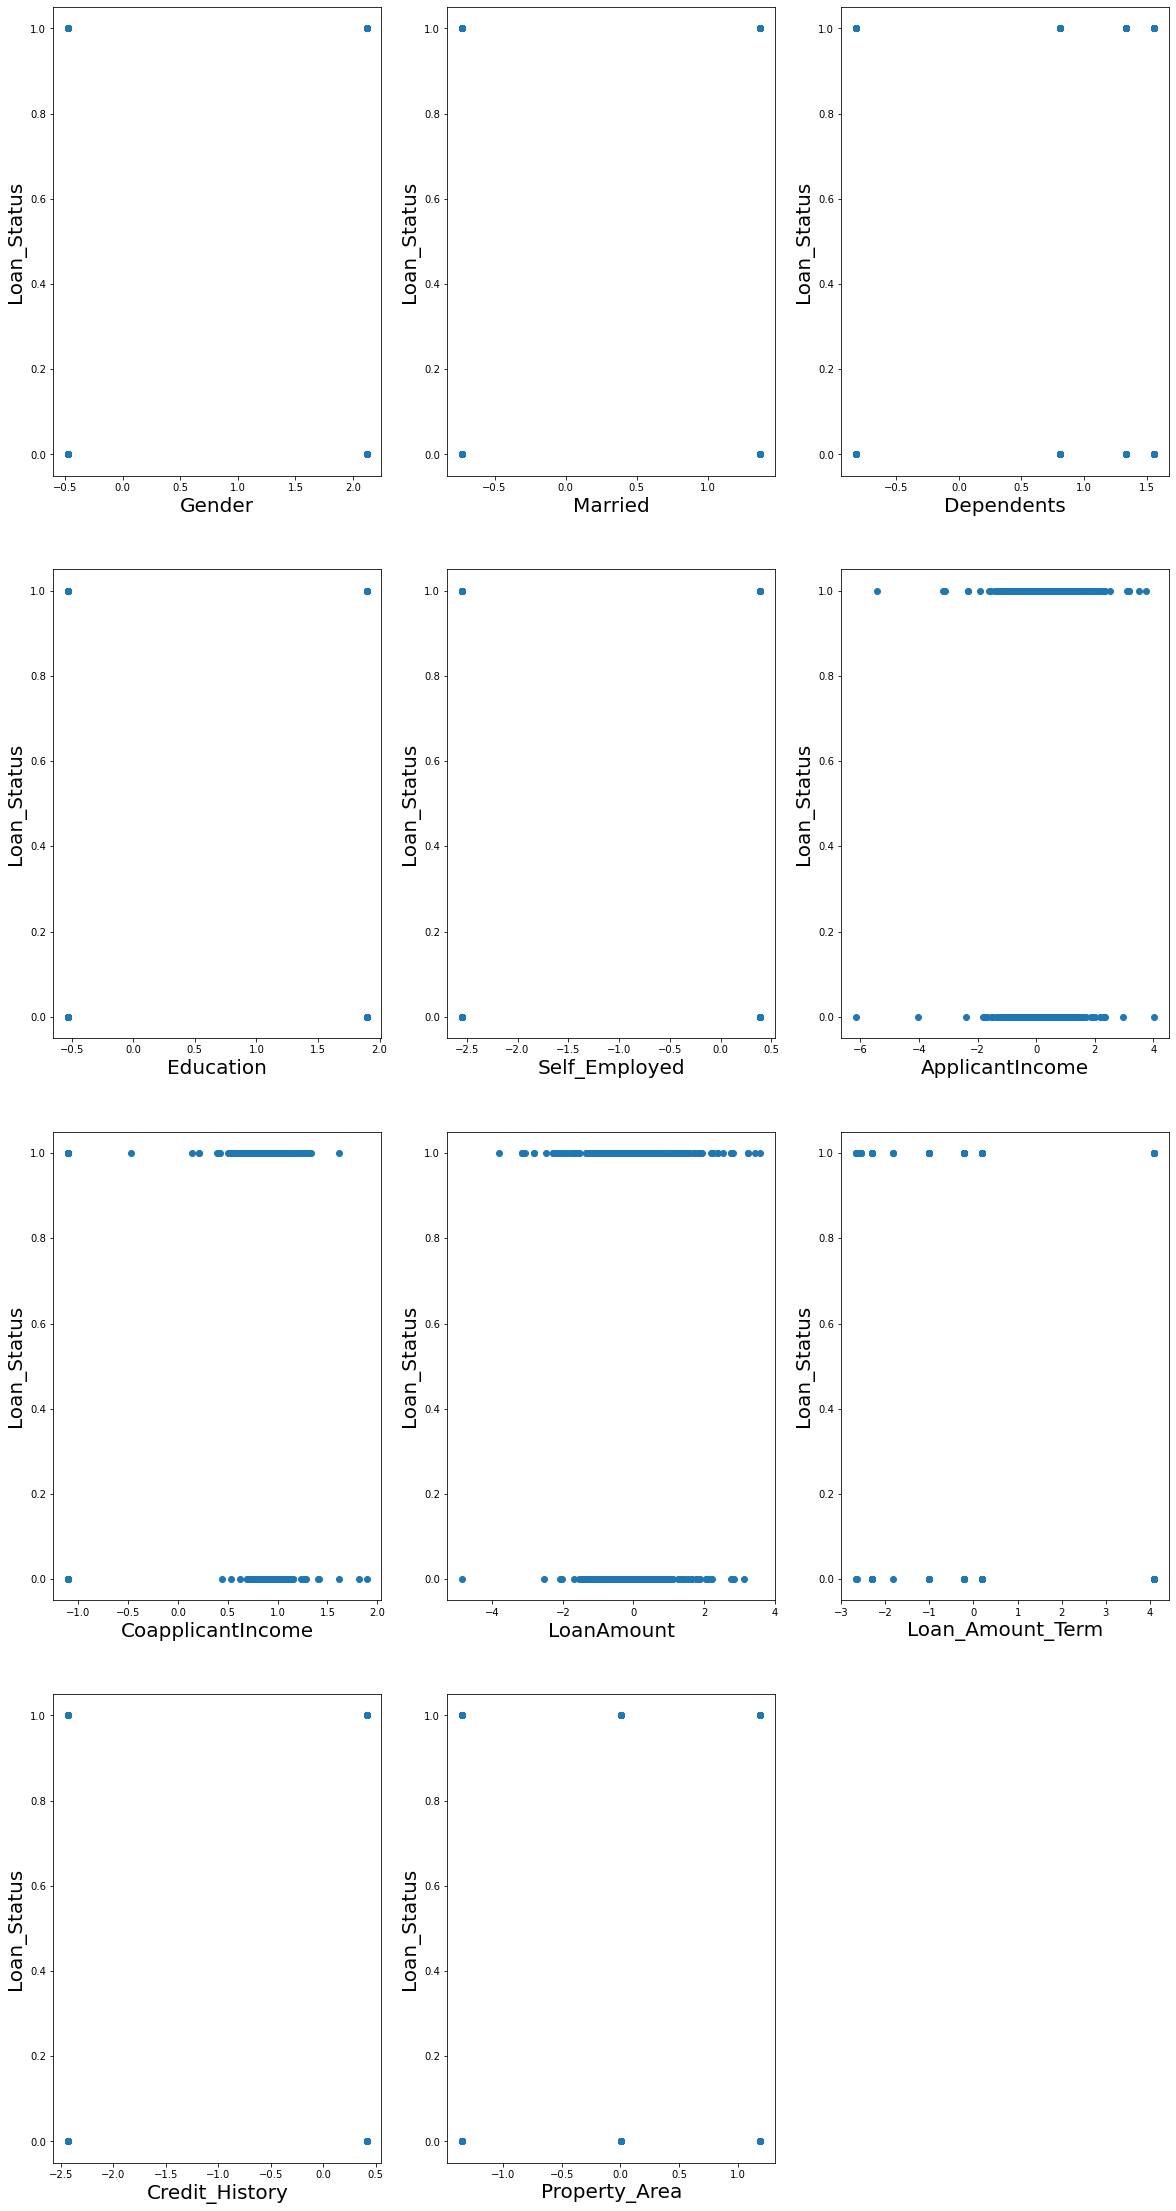

In [31]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Loan_Status', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship between the target and the labels looks fairly linear
## Standardisation

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

Thus the label data is standardised
## Finding best random state

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [34]:
maxacc = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('Best accuracy is:',maxacc,'on Random State',maxrs)

Best accuracy is: 0.8861788617886179 on Random State 8


Best accuracy score is 0.88 at random state 8
## Balance the imbalanced dataset

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Since the loan_status values are imbalanced, treat it using SMOTE

In [36]:
print ('Before fit {}'.format (Counter(y_train)))
ove_sam = SMOTE (0.75)
x_train,y_train = ove_sam.fit_resample(x_train,y_train)
print ('After fit {}'.format (Counter(y_train)))

Before fit Counter({1: 339, 0: 152})
After fit Counter({1: 339, 0: 254})


Thus the data is balanced

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 8)

## Logistic Regression

In [38]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 88.6178861788618
[[19 14]
 [ 0 90]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        33
           1       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123



## Decision tree classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 67.47967479674797
[[15 18]
 [22 68]]
              precision    recall  f1-score   support

           0       0.41      0.45      0.43        33
           1       0.79      0.76      0.77        90

    accuracy                           0.67       123
   macro avg       0.60      0.61      0.60       123
weighted avg       0.69      0.67      0.68       123



## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 86.1788617886179
[[20 13]
 [ 4 86]]
              precision    recall  f1-score   support

           0       0.83      0.61      0.70        33
           1       0.87      0.96      0.91        90

    accuracy                           0.86       123
   macro avg       0.85      0.78      0.81       123
weighted avg       0.86      0.86      0.85       123



## SVC

In [41]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy', accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 88.6178861788618
[[20 13]
 [ 1 89]]
              precision    recall  f1-score   support

           0       0.95      0.61      0.74        33
           1       0.87      0.99      0.93        90

    accuracy                           0.89       123
   macro avg       0.91      0.80      0.83       123
weighted avg       0.89      0.89      0.88       123



Both Logistic regression and Support Vector Classifier has the best accuracy score of 89. Check for cross-validation and decide on selecting the model

## Cross-Validation

In [42]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=10)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=10)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rf,x,y,cv=10)
print('RFC cvs:',sc2.mean())

sc3 = cross_val_score(svc,x,y,cv=5)
print('SVC cvs:',sc3.mean())

LR cvs: 0.8063194077207825
DT cvs: 0.7248810153358012
RFC cvs: 0.78841882601798
SVC cvs: 0.8094495535119284


Both the cross-validation score and the model score of both models show that the model neither underfits nor overfits.
- Model accuracy - 0.89
- Cross-Validation Score - 0.81

So, check for hyperparameter tuning

## Hyper parameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy'],
             'random_state' : [8]
         }

GVC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GVC.fit(x_train,y_train)
GVC.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'random_state': 8}

In [45]:
GVC_pred=GVC.best_estimator_.predict(x_test)
accuracy_score(y_test,GVC_pred)

0.8861788617886179

On hyper parameter tuning the accuracy did not increase. So save any one of the models - Logistic regression or Support Vector Classifier

## ROC AUC Score

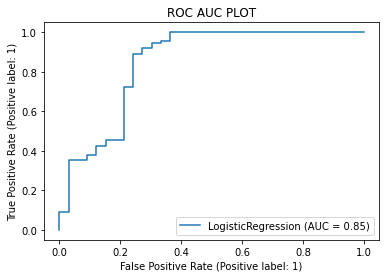

In [46]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

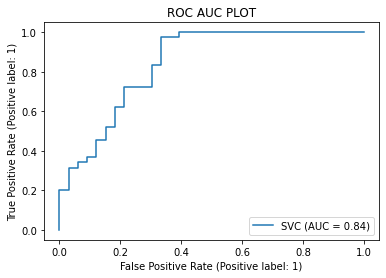

In [47]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

Since teh AUC score is more by 0.1, we can save Logistic Regression model

## Save the model

In [48]:
import joblib
joblib.dump(LR,'Loan_application_Status.pkl')

['Loan_application_Status.pkl']

Thus the model is saved